In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637239 entries, 0 to 637238
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        637239 non-null  float64
 1   lng        637239 non-null  float64
 2   desc       637239 non-null  object 
 3   zip        559840 non-null  float64
 4   title      637239 non-null  object 
 5   timeStamp  637239 non-null  object 
 6   twp        636966 non-null  object 
 7   addr       637239 non-null  object 
 8   e          637239 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df['zip'].value_counts().head(5)

19401.0    43587
19464.0    41977
19403.0    33458
19446.0    30961
19406.0    21571
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    53518
ABINGTON        38405
NORRISTOWN      35938
UPPER MERION    34690
CHELTENHAM      29401
Name: twp, dtype: int64

In [8]:
df['title'].nunique()

147

In [9]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [10]:
df['Reason'].value_counts().head()

EMS        318806
Traffic    222755
Fire        95678
Name: Reason, dtype: int64

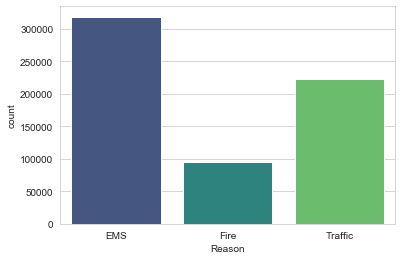

In [11]:
sns.countplot('Reason',data=df,palette='viridis')

In [12]:
type(df['timeStamp'].iloc[0])

str

In [13]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.day)

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['Day of Week'] = df['Day of Week'].map(dmap)

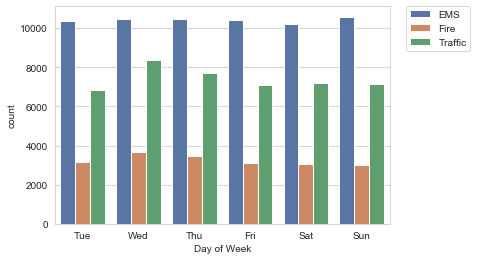

In [17]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='deep')
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [18]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,11899
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,11811
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,14577
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,11129
5,53028,53028,53028,46343,53028,53028,53002,53028,53028,53028,53028,10543


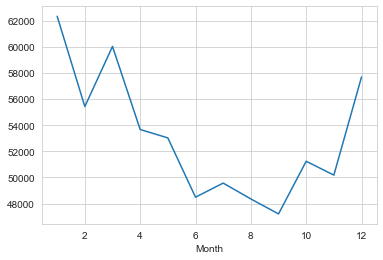

In [19]:
byMonth['Reason'].plot()

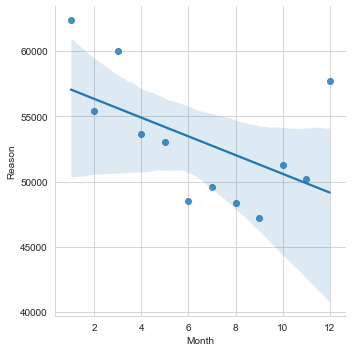

In [20]:
sns.lmplot(x='Month',y='Reason',data=byMonth.reset_index())

In [21]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

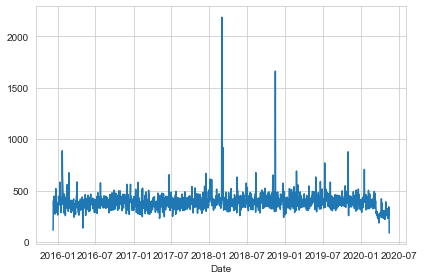

In [22]:
df.groupby('Date').count()['Reason'].plot()
plt.tight_layout()

In [23]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,490,374,326,309,282,349,586,897,1044,1079,...,1150,1218,1227,1311,1108,1017,939,787,678,588
Sat,419,374,355,271,278,370,555,897,1098,1091,...,1192,1256,1288,1447,1196,967,842,797,613,474
Sun,385,361,295,291,295,366,578,925,1061,1114,...,1238,1330,1401,1455,1153,1014,889,675,624,517
Thu,488,398,339,301,307,402,590,983,1207,1181,...,1275,1355,1329,1357,1153,1062,955,853,646,523
Tue,589,449,390,303,311,376,525,860,1056,1075,...,1247,1246,1235,1235,1125,908,841,745,645,503


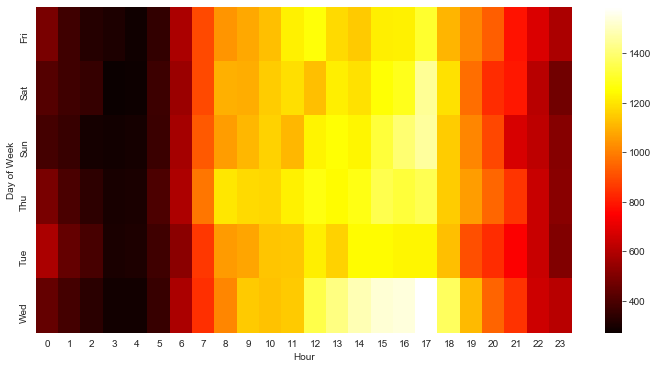

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='hot')

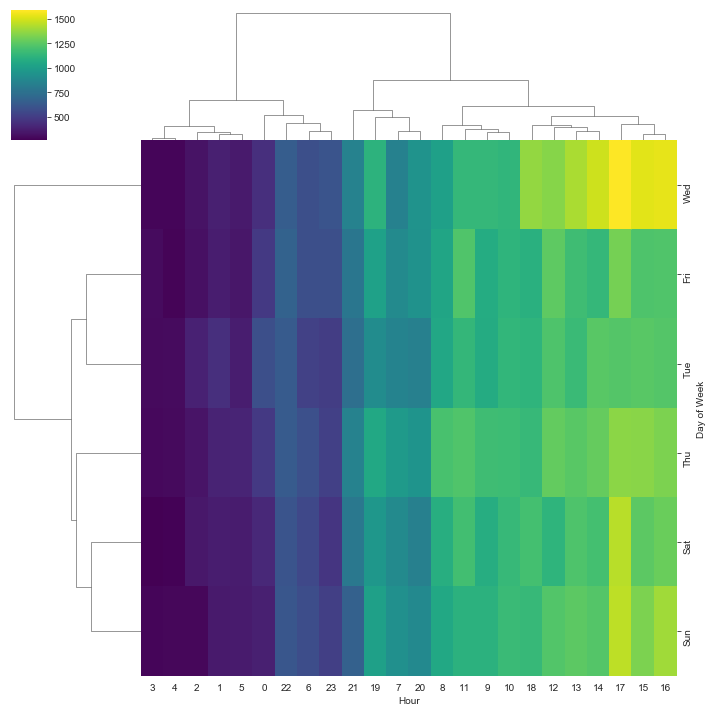

In [25]:
sns.clustermap(dayHour,cmap='viridis')

In [26]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,2248,1902,2074,1973,1803,1526,1315,1549,1501,1674,1500,1495
Sat,2088,1980,1891,1723,1706,1554,1564,1500,1598,1667,1482,1718
Sun,1954,1886,2035,1906,1651,1668,1615,1525,1644,1562,1640,1642
Thu,2125,1937,2583,2039,1862,1552,1603,1529,1461,1733,1710,1490
Tue,1571,2028,2020,1700,1571,1639,1618,1699,1486,1403,2008,1586


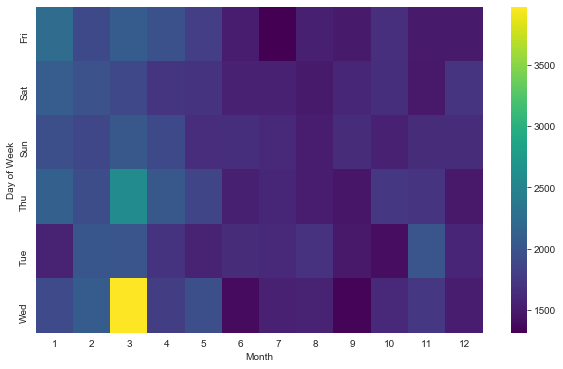

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(dayMonth,cmap='viridis')